In [1]:
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import matplotlib as mpl

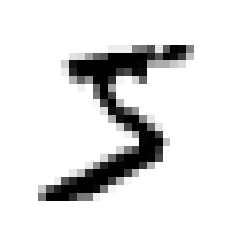

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')

plt.show()

In [7]:
y[0]

'5'

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y = y.astype(np.uint8)

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis('off')

In [11]:
X[0].shape

(784,)

In [12]:
np.zeros([4,3,2,1]).transpose(0, 2, 1, 3).reshape(8, 3).shape

(8, 3)

In [13]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row) # 한줄에 10개씩
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    n_empty = n_rows * images_per_row - len(instances) # 빈 자리
    # 입력값이랑 empty값 합쳐서 n * n 형태로
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))])
    
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    # 각 그림의 가로/세로를 하나의 그림처럼 합침
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                        images_per_row * size)
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis('off')

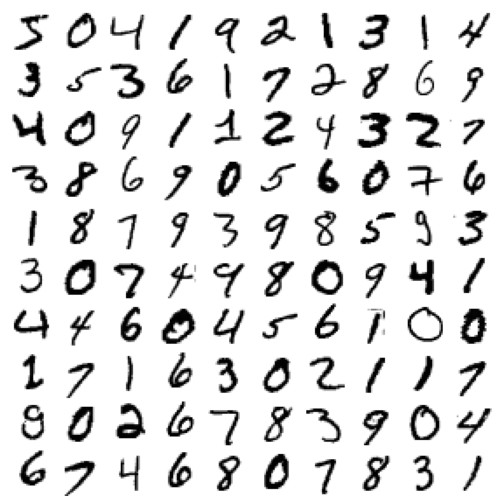

In [14]:
plt.figure(figsize=(9 ,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
# 이진분류
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [19]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96455, 0.94515, 0.9685 ])

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [23]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True)
# index 반환
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # 모델 복사
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95975
0.96475
0.9637


In [24]:
from sklearn.base import BaseEstimator

In [25]:
# 항상 5가 아니라고 분류하는 분류기

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [26]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_train_5, y_train_pred)

array([[51928,  2651],
       [  690,  4731]])

In [31]:
import pandas as pd

In [32]:
pd.DataFrame(data=[[53790,   789], [ 1349,  4072]])

,0,1
0,53790,789
1,1349,4072


In [33]:
pd.DataFrame(data=[['True Negative', 'False Positive'], ['False Negative', 'True Positive']])

,0,1
0,True Negative,False Positive
1,False Negative,True Positive


In [34]:
from sklearn.metrics import precision_score, recall_score

In [35]:
# 정확도(TP/(TP+FP)
precision_score(y_train_5, y_train_pred)

0.6408832294771065

In [36]:
4072/(4072+789)

0.8376877185764247

In [37]:
# 재현율(TP/(TP+FN))
recall_score(y_train_5, y_train_pred)

0.8727172108467073

In [38]:
from sklearn.metrics import f1_score

In [39]:
# f1 score: precision, recall 조화평균
f1_score(y_train_5, y_train_pred)

0.7390455362024526

In [40]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3333.21063124])

In [41]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [42]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [44]:
from sklearn.metrics import precision_recall_curve

In [45]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [46]:
recalls.shape

(59928,)

In [47]:
thresholds.shape

(59927,)

In [48]:
precisions.shape

(59928,)

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    # threshold가 1개 더 적어서 [:-1]
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
    plt.legend(loc='center right')
    plt.xlabel('Threshold')
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

In [50]:
# precisions 0.9 이상만

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

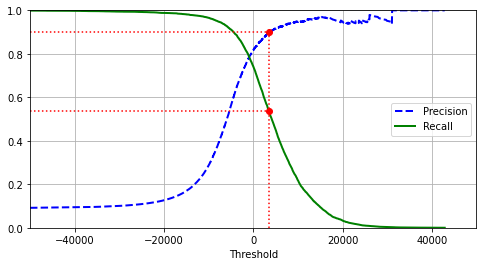

In [51]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.9], 'r:')
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], 'r:')
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], 'r:')

plt.plot([threshold_90_precision], [0.9], 'ro')
plt.plot([threshold_90_precision], [recall_90_precision], 'ro')

plt.show()

# Precision <-> recall tradeoff

In [52]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

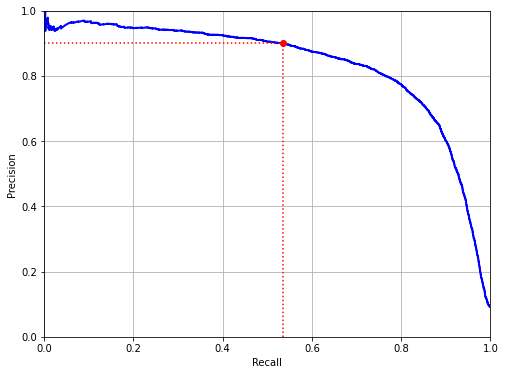

In [53]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], 'r:')
plt.plot([0.0, recall_90_precision], [0.9, 0.9], 'r:')
plt.plot([recall_90_precision], [0.9], 'ro')

plt.show()

In [54]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
threshold_90_precision

3522.9112691375462

In [55]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [56]:
precision_score(y_train_5, y_train_pred_90)

0.9000620732464308

In [57]:
recall_score(y_train_5, y_train_pred_90)

0.5349566500645637

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [144]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    
# from sklearn.metrics import plot_roc_curve 쓰면 됨(모델, x, y)

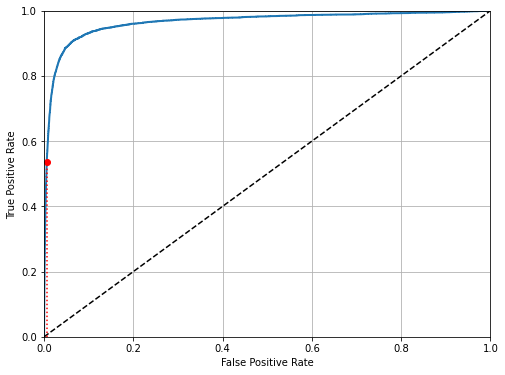

In [65]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0, recall_90_precision], 'r:')
plt.plot([0, fpr_90], [recall_90_precision, recall_90_precision], 'r:')
plt.plot([fpr_90], [recall_90_precision], 'ro')
plt.show()

# recall 90%인 지점

In [68]:
from sklearn.metrics import roc_auc_score

In [69]:
roc_auc_score(y_train_5, y_scores)

0.9650470457809198

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
forest_clf = RandomForestClassifier(n_estimators=100)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

In [73]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

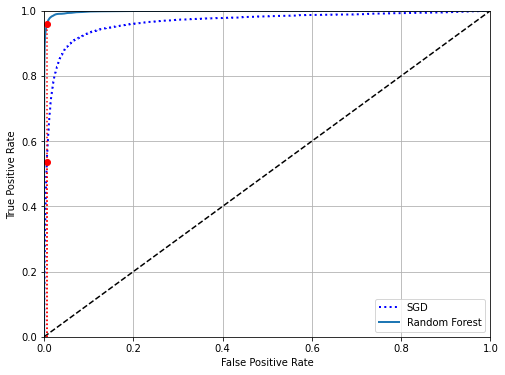

In [76]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b:', linewidth=2, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], 'r:')
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], 'r:')
plt.plot([fpr_90], [recall_90_precision], 'ro')
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], 'r:')
plt.plot([fpr_90], [recall_for_forest], 'ro')
plt.grid(True)
plt.legend(loc='lower right')

plt.show()

In [77]:
roc_auc_score(y_train_5, y_scores_forest)

0.998264382291443

In [89]:
from sklearn.svm import SVC

In [90]:
svm_clf = SVC(gamma='auto') # OvO => n(n-1)/2개의 분류
svm_clf.fit(X_train[:1000], y_train[:1000]) # 다중분류
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [92]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [93]:
np.argmax(some_digit_scores)

5

In [94]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [95]:
from sklearn.multiclass import OneVsRestClassifier # One vs Rest 방식으로 분류

In [96]:
ovr_clf = OneVsRestClassifier(SVC(gamma='auto'))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [98]:
ovr_clf.estimators_ # OvR방식이라서 10가지 분류

[SVC(gamma='auto'),
 SVC(gamma='auto'),
 SVC(gamma='auto'),
 SVC(gamma='auto'),
 SVC(gamma='auto'),
 SVC(gamma='auto'),
 SVC(gamma='auto'),
 SVC(gamma='auto'),
 SVC(gamma='auto'),
 SVC(gamma='auto')]

In [99]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [104]:
np.argmax(sgd_clf.decision_function([some_digit]))

5

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

In [102]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_Clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

In [109]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5574,    0,   21,    6,    8,   43,   33,    5,  232,    1],
       [   0, 6400,   39,   22,    4,   44,    4,    7,  210,   12],
       [  28,   27, 5243,   92,   69,   25,   65,   38,  360,   11],
       [  22,   17,  117, 5221,    2,  206,   26,   38,  409,   73],
       [  12,   14,   47,   10, 5187,   12,   34,   26,  337,  163],
       [  26,   15,   32,  167,   54, 4457,   71,   14,  524,   61],
       [  29,   15,   45,    2,   43,   98, 5548,    4,  133,    1],
       [  21,    9,   51,   23,   49,   13,    3, 5691,  197,  208],
       [  17,   63,   49,   87,    3,  123,   23,   11, 5434,   41],
       [  22,   18,   29,   62,  116,   36,    1,  175,  376, 5114]])

In [110]:
from sklearn.metrics import plot_confusion_matrix

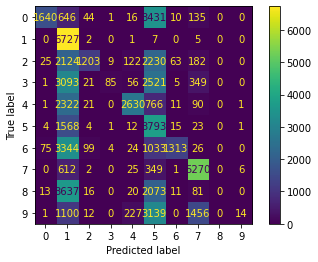

In [111]:
plot_confusion_matrix(sgd_clf, X_train_scaled, y_train)

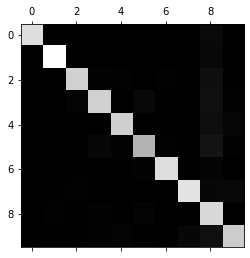

In [113]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# 대각선이 올바르게 분류된 경우

In [114]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

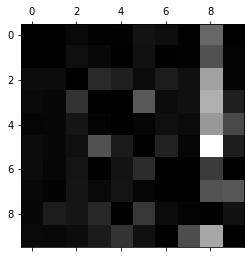

In [116]:
# 대각선 0으로 채웠을 때
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# 8로 예측된 결과에 error가 많음

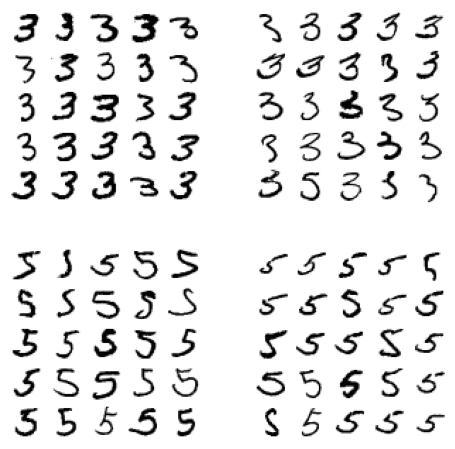

In [121]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # 3 - 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5) # 3인데 5로 잘못 예측
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5) # 5인데 3으로 잘못 예측
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

# 악필은 컴터도 어쩔 수 없다는 결론

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [127]:
y_multilabel.shape

# multilabel분류 => label이 다차원으로 입력

(60000, 2)

In [128]:
knn_clf.predict([some_digit])
# 결과도

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [129]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

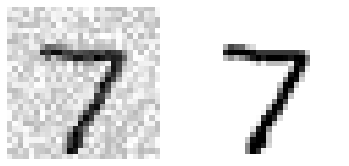

In [130]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

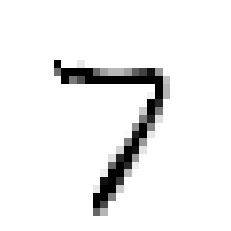

In [134]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [143]:
from sklearn.dummy import DummyClassifier
# 랜덤 분류기

In [138]:
dmy_clf = DummyClassifier(strategy='prior')
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_scores_dmy = y_probas_dmy[:, 1]

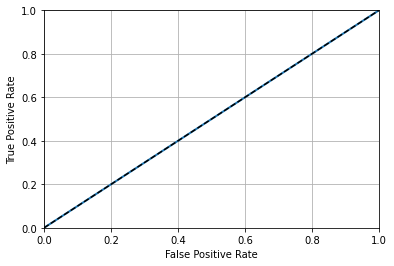

In [145]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

In [147]:
from scipy.ndimage.interpolation import shift

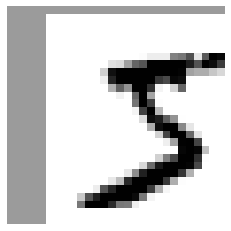

In [156]:
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100)) # new: 명암대비

In [170]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

In [163]:
np.concatenate(X_train_expanded).shape

(300000, 784)

In [167]:
X_train_expanded[2].shape

(60000, 784)

In [171]:
X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)

In [172]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier()

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
y_knn_expanded_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_expanded_pred)

0.9754

In [176]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8]])

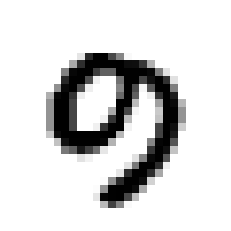

In [177]:
plot_digit(ambiguous_digit)

In [178]:
train_data = pd.read_csv('/Users/jihoon/Jupyter Notebook/Kaggle/titanic/data/train.csv')
test_data = pd.read_csv('/Users/jihoon/Jupyter Notebook/Kaggle/titanic/data/test.csv')

In [179]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [181]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [184]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [185]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [186]:
# 수치형 파이프라인
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [187]:
from sklearn.preprocessing import OneHotEncoder

In [188]:
# 범주형 파이프라인
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

In [189]:
from sklearn.compose import ColumnTransformer

In [190]:
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

In [191]:
preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [192]:
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])

In [193]:
y_train = train_data['Survived']

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [196]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [197]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.812621722846442

In [199]:
forest_scores

array([0.76666667, 0.82022472, 0.75280899, 0.83146067, 0.87640449,
       0.82022472, 0.80898876, 0.76404494, 0.84269663, 0.84269663])

In [198]:
from sklearn.svm import SVC

In [200]:
svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

In [201]:
svm_scores

array([0.81111111, 0.85393258, 0.7752809 , 0.87640449, 0.83146067,
       0.79775281, 0.82022472, 0.78651685, 0.85393258, 0.84269663])

In [202]:
import matplotlib.pyplot as plt

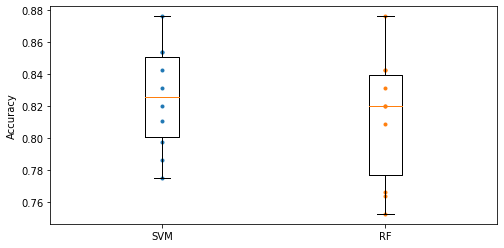

In [213]:
plt.figure(figsize=(8, 4))
plt.plot([1]*len(svm_scores), svm_scores, '.')
plt.plot([2]*len(forest_scores), forest_scores, '.')
plt.boxplot([svm_scores, forest_scores], labels=['SVM', 'RF'])
plt.ylabel('Accuracy')
plt.show()

# 각 cv score의 boxplot을 보고 전체적인 경향을 볼 수 있음
# SVM이 평균/중앙에 더 몰려있으므로 더 일반적 => 좋은 모델

In [215]:
train_data['AgeBucket'] = train_data['Age'] // 15 * 15 # 나이 범주 구분

In [217]:
train_data[['AgeBucket', 'Survived']].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [218]:
# 가족이랑 같이 탄 경우 
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
